# Families of Discrete Distributions
- A ***families of probability distributions*** is a collection of probability distributions having some funcitonal form that is parameterized by a well-defined parameters. 
- In the discrete case, the PMF, $p(x;\theta) =  \mathbb{P}(X=x)$, is parameterized by the parameter $\theta\in\Theta$ where $\Theta$ is called the ***parameter space***. The parameter $\theta$ affects the actual form of the PMF, including the support of the random variable. Hence, a family of distributions is the collection of PMFs $p(\cdot; \theta)$ for all $\theta\in\Theta$

In [1]:
using Distributions
dists = [
    DiscreteUniform(10,20),
    Binomial(10, 0.5),
    Geometric(0.5),
    NegativeBinomial(10,0.5),
    Hypergeometric(30,40,10),
    Poisson(5.5)]

println("Distribution \t\t\t\t Parameters \t Support")
reshape([dists; params.(dists);
    ((d) -> (minimum(d), maximum(d))).(dists)],
    length(dists),3)

Distribution 				 Parameters 	 Support


6×3 Matrix{Any}:
 DiscreteUniform(a=10, b=20)               (10, 20)      (10, 20)
 Binomial{Float64}(n=10, p=0.5)            (10, 0.5)     (0, 10)
 Geometric{Float64}(p=0.5)                 (0.5,)        (0, Inf)
 NegativeBinomial{Float64}(r=10.0, p=0.5)  (10.0, 0.5)   (0, Inf)
 Hypergeometric(ns=30, nf=40, n=10)        (30, 40, 10)  (0, 10)
 Poisson{Float64}(λ=5.5)                   (5.5,)        (0, Inf)

In [2]:
[dists; params.(dists);
    ((d) -> (minimum(d), maximum(d))).(dists)]

18-element Vector{Any}:
 DiscreteUniform(a=10, b=20)
 Binomial{Float64}(n=10, p=0.5)
 Geometric{Float64}(p=0.5)
 NegativeBinomial{Float64}(r=10.0, p=0.5)
 Hypergeometric(ns=30, nf=40, n=10)
 Poisson{Float64}(λ=5.5)
 (10, 20)
 (10, 0.5)
 (0.5,)
 (10.0, 0.5)
 (30, 40, 10)
 (5.5,)
 (10, 20)
 (0, 10)
 (0, Inf)
 (0, Inf)
 (0, 10)
 (0, Inf)

## Discrete Uniform Distribution
- ***Discrete uniform distribution*** is simply a probability distribution that places equal probabilities for all equal outcomes.
- One example is given by the proability of the oucomes of a die toss. The probability of each possible outcome for a fair, six-sided die is given by
$$
\mathbb{P}(X=x) = \frac{1}{6}\quad \text{for }x = 1,\cdots, 6.
$$

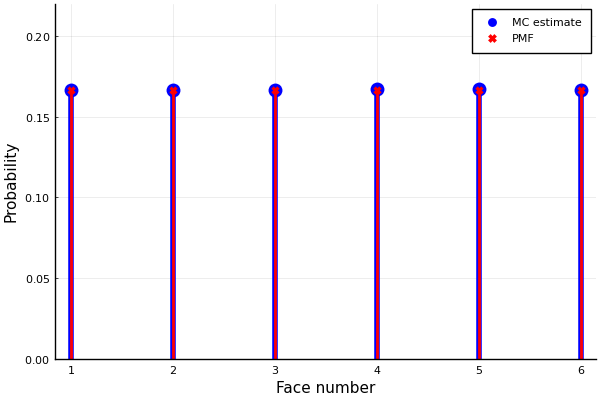

In [3]:
using StatsBase, Plots; pyplot()

faces, N = 1:6, 10^6
mcEstimate = counts(rand(faces,N),faces)/N

plot(faces, mcEstimate,
    line=:stem, marker=:circle,
    c=:blue, ms=10, msw=0, lw=4, label="MC estimate")
plot!([i for i in faces], [1/6 for _ in faces],
    line=:stem, marker=:xcross, c=:red,
    ms=6, msw=0, lw=2, label="PMF",
    xlabel="Face number", ylabel="Probability", ylims=(0,0.22))

## Binomial Distribution
- ***Binomial distribution*** is a discrete distribution with arise there multiple identical and independent yes/no, true/false, success/failure trials (also known as ***Bernoulli trials***) are performed. For each trial, there can only be two outcomes, and the probability weightings of each unique trial must be the same.
- As an example, consider a two-sided coin, which is flipped $n$ times in a row. If the probability of obtaining a head in a single flip is $p$, then the probability of obtaining $x$ heads total is given by the PMF
$$
\mathbb{P}(X=x) = {n\choose x}p^{x}(1-p)^{n-x}\quad \text{for }x = 0,1,\cdots,n
$$

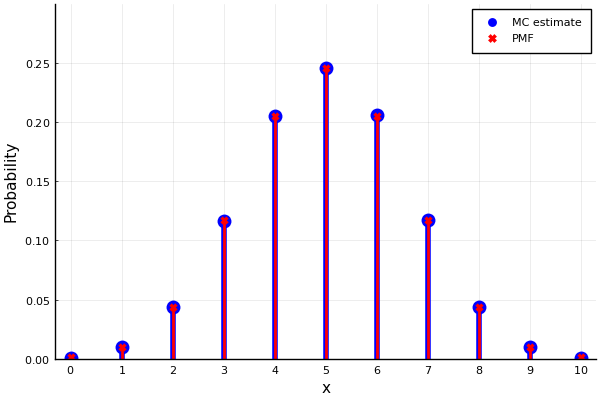

In [4]:
using StatsBase, Distributions, Plots; pyplot()

binomialRV(n,p) = sum(rand(n) .< p)

p,n,N = 0.5, 10, 10^6

bDist = Binomial(n,p)
xGrid = 0:n
bPmf = [pdf(bDist, i) for i in xGrid]
data = [binomialRV(n,p) for _ in 1:N]
pmfEst = counts(data, 0:n)/N

plot(xGrid, pmfEst, 
    line=:stem, marker=:circle,
    c=:blue, ms=10, msw=0, lw=4, label="MC estimate")
plot!(xGrid, bPmf,
    line=:stem, marker=:xcross, c=:red,
    ms=6, msw=0, lw=2, label="PMF", xticks=(0:1:10),
    ylims=(0,0.3), xlabel="x", ylabel="Probability")

## Geometric Distribution
- In this case, consider an infinite sequence of independent trials, each with success probability $p$, and let $X$ be the first trial that is successful. Using first principles it is easy to see that the PMF is:
$$
\mathbb{P}(X=x) = p(1-p)^{x-1} \quad \text{for }x=1,2,\cdots
$$
- An alernative version of the geometric distribution is the distribution of the random variable $\tilde{X}$, counting the number of the number of failures until success. $\tilde{X}=X-1$
$$
\mathbb{P}(\tilde{X} = x) = p(1-p)^{x}\quad \text{for }x=0,1,\cdots
$$
- In the Julia `Distributions` package, `Geometric` stands for the distribution of $\tilde{X}$, not $X$.
- ***Example*** Roulette is a game of chance, where a ball is spun on the inside edge of a horizontal wheel. As the ball loses momentum, it eventually falls vertically down, and lands on one of 37 spaces, numbered $0$ to $36$. There are 18 black spaces, 18 red, and a single space ("zero") is green. Each spins of the wheel is independent, and each of the possible 37 outcomes is equally likely. Now let us assume that a gambler goes to the casino and plays a series of roulette spins. There are various ways to bet on the outcome of roulette, but in this case he always bets on black (if the ball lands on black he wins, otherwise he loses). Say that the gambler plays until his first win. In this case, the number of plays is a geometric random variable with support $x=1,2,\cdots$.


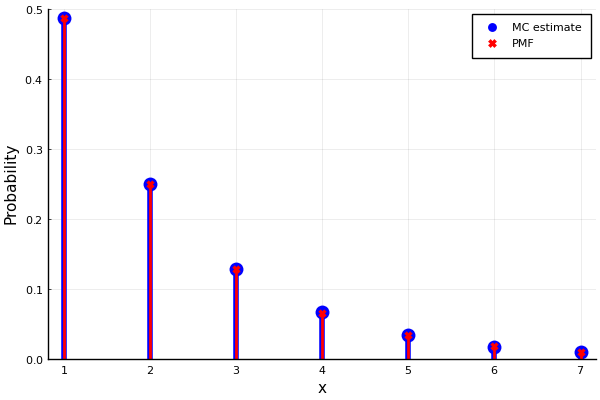

In [5]:
using StatsBase, Distributions, Plots; pyplot()

function rouletteSpins(p)
    x = 0
    while true
        x += 1
        if rand() < p
            return x
        end
    end
end

p, xGrid, N = 18/37, 1:7, 10^6
mcEstimate = counts([rouletteSpins(p) for _ in 1:N], xGrid)/N
gDist = Geometric(p)
gPmf = [pdf(gDist,x-1) for x in xGrid]
plot(xGrid, mcEstimate, line=:stem, marker=:circle,
    c=:blue, ms=10, msw=0, lw=4, label="MC estimate")
plot!(xGrid,gPmf, line=:stem, marker=:xcross,
    c=:red, ms=6, msw=0, lw=2, label="PMF",
    ylims=(0,0.5), xlabel="x", ylabel="Probability")

## Negative Binomial Distribution
- Recall the previous example above of a roulette gambler. Assume now that the gambler plays until he wins for $r$-th time. The ***negative binomial distribution*** describes this situation. The PMF is
$$
\mathbb{p}(X=x) = {x-1\choose r-1}p^{r}(1-p)^{x-r}\quad \text{for x} = r, r+1, r+2, \cdots
$$
- Notice that with $r=1$ the expression reduces to the geometric PMF. Similarly to the geometric case, there is an alternative version of the negative binomial distribution. Let $\tilde{X}$ denote the number of failures until the $r$-th success. Here, like in the geometric case, when both random variables are coupled on the same sequence of trials, we have $\tilde{X} = X-r$.
$$
\mathbb{P}(\tilde{X} = x) = {x+r-1 \choose x}p^{r}(1-p)^{x}\quad \text{for }x=0,1,2,\cdots
$$
- We simulate a gambler who bets consistently on black much like in the previous example, and determine the PMF for $r=5$. That is, we determine the probabilities that $x$ plays will occur up to the $5$-th success (or win).

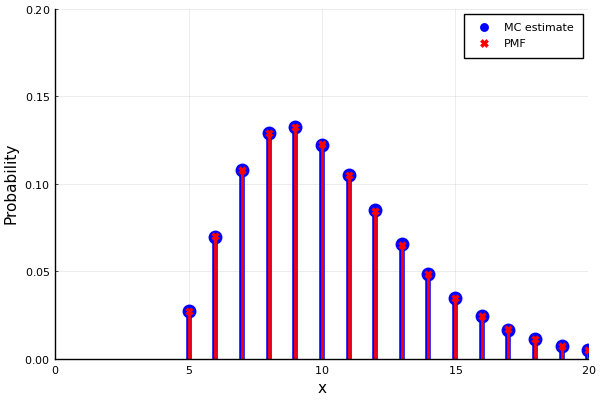

In [6]:
using StatsBase, Distributions, Plots

function rouletteSpins(r,p)
    x = 0
    wins = 0
    while true
        x += 1
        if rand() < p
            wins += 1
            if wins == r
                return x                
            end
        end
    end
end

r, p, N = 5, 18/37, 10^6
xGrid = r:r+15

mcEstimate = counts([rouletteSpins(r,p) for _ in 1:N],xGrid)/N

nbDist = NegativeBinomial(r,p)
nbPmf = [pdf(nbDist,x-r) for x in xGrid]

plot(xGrid, mcEstimate,
    line=:stem, marker=:circle, c=:blue,
    ms=10, msw=0, lw=4, label="MC estimate")
plot!(xGrid, nbPmf, line=:stem,
    marker=:xcross, c=:red, ms=6, msw=0, lw=2, label="PMF",
    xlims=(0,maximum(xGrid)), ylims=(0,0.2),
    xlabel="x", ylabel="Probability")

## Hypergeometric Distribution
- Considering the fishing problem where we fish without replacement. In this scenario, each time we sample from the population it decreases, and hence the probability of success changes from each subsequent sample. The ***hypergeometric distribution*** describes this situation. The PMF is given by
$$
p(x) = \frac{\binom{K}{x}\binom{L-K}{n-x}}{\binom{L}{n}} \quad \text{for } x = \max(0, n+k-L),\cdots, \min(n,K).
$$
  - Here the parameter $L$ is the population size, and $K$ is the number of successes present in the population (this implies that $L-K$ is the number of failures present in the population). The parameter $n$ is the number of samples taken from the population, and the input argument $x$ is the number of successful samples observed. Hence, a hypergeometric random variable $X$ with $\mathbb{P}(X=x) = p(x)$ describes the number of successful samples when ***sampling without replacement***.
  - To understand of the support of the distribution, first consider the least possible value, $\max(0,n+K-L)$. It is either $0$ or $n+K-L$ if $n>L-K$. The latter case stems from a situation where the number of samples $n$ is greater than the number of failures present in the population. As for the upper value of the support, it is $\min(n,K)$ because if $K<n$ then it isn't possible to sample only success.
- ***Example*** consider a pond which contains a combination of gold and silver fish. In this example, there are $N=500$ fish total, and we will define the catch of a gold fish a success, and a silver fish a failure. Now say that we sample $n=30$ fish without replacement. We consider several of these cases, where the only difference between each is the number of success, $K$, (gold fish) in the populaiton.

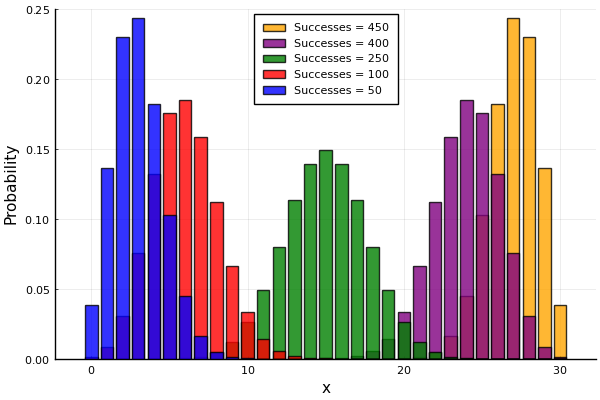

In [7]:
using Distributions, Plots; pyplot()

L, K, n = 500, [450, 400, 250, 100, 50], 30
hyperDists = [Hypergeometric(k, L-k, n) for k in K]
xGrid = 0:1:n
pmfs = [pdf.(dist, xGrid) for dist in hyperDists]
labels = "Successes = ".* string.(K)

bar(xGrid, pmfs,
    alpha=0.8, c=[:orange :purple :green :red :blue],
    label=hcat(labels...), ylims=(0,0.25),
    xlabel="x", ylabel="Probability", legend=:top)